# Professor Adams - Financial Risk Management (FRE 6123) 
# Homework #2

### README：

This section summarizes the tasks I performed in Part 2.

- Q1: Computed the EUR investor’s total return on a USD bond by decomposing it into (i) USD asset return and (ii) FX return, and verified the multiplicative consistency check.

- Q2: Derived forward rates f(1,2) and f(2,1) from spot zero yields so that a 3-year investor is indifferent across: (a) buying 3Y now, (b) 1Y→2Y roll, and (c) 2Y→1Y roll.

- Q3: Applied the cost-of-carry model to a 9M platinum futures, compared theoretical vs observed futures, identified a small overpricing, and outlined a cash-and-carry arbitrage with the implied holding-period and annualized returns.

- Q4: Built a 6M FX forward hedge using covered interest parity for a USD receivable, then marked-to-market the forward after 3 months under two spot scenarios to compute the immediate close-out cash effect in EUR.

- Q5: Extracted company data from Excel, computed LTM EV/EBITDA for peers, benchmarked Eastman against the group (mean/median), and assessed valuation; then used CAPM to estimate expected return and computed alpha versus a 1-year analyst forecast.

---
---
### Part 1 Set up Environment

In [12]:
# import libraries
import numpy as np
import pandas as pd
import yfinance as yf
from typing import Any

---
---
### Part 2 Answer

#### Question 1 

In [13]:
# Inputs
par = 1_000_000          # USD par
P0_per100 = 91.8189      # initial price per 100
P1_per100 = 96.25        # price after 1 year per 100
S0 = 1.078               # USD per EUR at purchase (USD/EUR)
S1 = 1.125               # USD per EUR at sale (USD/EUR)

# Convert to USD cash amounts
P0_usd = par * P0_per100 / 100.0
P1_usd = par * P1_per100 / 100.0

# EUR (domestic) values
E0_eur = P0_usd / S0
E1_eur = P1_usd / S1

# Returns
R_dom = E1_eur / E0_eur - 1.0                 # total domestic (EUR) return
R_usd = P1_usd / P0_usd - 1.0                 # foreign asset return in USD
R_fx  = (S0 / S1) - 1.0                       # FX return from EUR investor viewpoint

# Consistency check (multiplicative decomposition)
R_check = (1 + R_usd) * (1 + R_fx) - 1.0

# Print results
print(f"P0_usd = {P0_usd:,.2f}, P1_usd = {P1_usd:,.2f}")
print(f"EUR initial = {E0_eur:,.2f}, EUR final = {E1_eur:,.2f}")
print(f"Domestic EUR return     = {R_dom:.6%}")
print(f"USD asset return        = {R_usd:.6%}")
print(f"FX return (EUR basis)   = {R_fx:.6%}")
print(f"Check (USD*FX - 1)      = {R_check:.6%}")


P0_usd = 918,189.00, P1_usd = 962,500.00
EUR initial = 851,752.32, EUR final = 855,555.56
Domestic EUR return     = 0.446519%
USD asset return        = 4.825913%
FX return (EUR basis)   = -4.177778%
Check (USD*FX - 1)      = 0.446519%


#### Interpretation

  Total domestic (EUR) return: ~0.45%.
  You began with the USD bond valued at ~€851,752 and ended at ~€855,556.

- Decomposition:

  Question 1.Foreign-asset (USD) return: ~+4.83% — the USD zero-coupon appreciated as it rolled down the curve (2y → 1y) and yields moved.

  Question 2. FX return (EUR investor holding USD): ~−4.18% — EUR strengthened vs USD (USD/EUR rose from 1.078 to 1.125), reducing EUR-denominated value.

- Net effect: The positive USD bond performance was largely offset by EUR appreciation, leaving a small positive EUR return.

---
#### Question 2

In [14]:
# Zero-coupon spot yields (annual, discrete compounding)
y1 = 0.025   # 1Y spot
y2 = 0.0275  # 2Y spot
y3 = 0.0325  # 3Y spot

# Forward rates that make a 3Y investor indifferent:
# (1+y3)^3 = (1+y1)*(1+f12)^2 = (1+y2)^2*(1+f21)

f12 = ((1 + y3)**3 / (1 + y1))**(1/2) - 1     # 2Y forward starting in 1Y
f21 = ((1 + y3)**3 / (1 + y2)**2) - 1         # 1Y forward starting in 2Y

# Print results and simple checks
print(f"f(1,2)  (2Y forward starting in 1Y): {f12:.6%}")
print(f"f(2,1)  (1Y forward starting in 2Y): {f21:.6%}")

lhs = (1 + y3)**3
rhs1 = (1 + y1) * (1 + f12)**2
rhs2 = (1 + y2)**2 * (1 + f21)
print(f"Check equality -> (1+y3)^3: {lhs:.8f}, via 1Y->2Y: {rhs1:.8f}, via 2Y->1Y: {rhs2:.8f}")


f(1,2)  (2Y forward starting in 1Y): 3.627055%
f(2,1)  (1Y forward starting in 2Y): 4.257311%
Check equality -> (1+y3)^3: 1.10070308, via 1Y->2Y: 1.10070308, via 2Y->1Y: 1.10070308


#### Interpretation 

We need the **forward rates** that make a 3-year investor **indifferent** among three strategies:

1. Buy the 3-year zero today.
2. Buy the 1-year zero today and then roll into a 2-year zero after one year.
3. Buy the 2-year zero today and then roll into a 1-year zero after two years.

Let the **spot** zero yields be $y_1=2.50\%$, $y_2=2.75\%$, $y_3=3.25\%$ (annual, discrete).
Indifference requires the same 3-year gross return:

$$
(1+y_3)^3 \;=\; (1+y_1)\,(1+f_{1,2})^{2} \;=\; (1+y_2)^{2}\,(1+f_{2,1}).
$$

Solve for the **forwards**:

$$
\boxed{\, f_{1,2} \;=\; \left(\dfrac{(1+y_3)^3}{1+y_1}\right)^{\!\tfrac{1}{2}} - 1 \,}
\qquad
\boxed{\, f_{2,1} \;=\; \dfrac{(1+y_3)^3}{(1+y_2)^2} - 1 \,}
$$

Plugging in $y_1=0.025,\; y_2=0.0275,\; y_3=0.0325$:

$$
f_{1,2} \approx 3.627\%,
\qquad
f_{2,1} \approx 4.257\%.
$$

**Reading the results.**

* If, one year from now, the **2-year** yield equals $\approx 3.627\%$, then the **1Y→2Y roll** matches buying the 3-year zero today.
* If, two years from now, the **1-year** yield equals $\approx 4.257\%$, then the **2Y→1Y roll** also matches the 3-year zero.
* Any realized forward above (below) these levels makes the corresponding roll **outperform (underperform)** the 3-year buy-and-hold.
---


#### Question 3

In [15]:
# --- Inputs ---
S0 = 896.0        # spot (USD/oz)
F_obs = 925.0     # 9M futures (USD/oz)
c = 0.0375        # annualized cost of carry (financing + storage - income), simple annual
T = 0.75          # 9 months = 0.75 years

# --- Theoretical futures under cost-of-carry (discrete compounding) ---
F_theo = S0 * (1 + c)**T

# Mispricing and arbitrage payoff (cash-and-carry if futures overpriced)
mispricing = F_obs - F_theo                      # >0 => short futures / long spot+carry
profit_per_oz_at_maturity = mispricing           # payoff per ounce at delivery

# Return metrics (using fully-funded spot outlay S0 as base)
hpr = profit_per_oz_at_maturity / S0             # 9M holding-period return on capital
ann_ret = (1 + hpr)**(1/T) - 1                   # annualized simple equivalent

print(f"Theoretical F*: {F_theo:.4f} USD/oz")
print(f"Observed F  : {F_obs:.4f} USD/oz")
print(f"Mispricing  : {mispricing:.4f} USD/oz")
print(f"Arb profit (per oz at delivery): {profit_per_oz_at_maturity:.4f} USD")
print(f"Holding-period return (9M)     : {hpr:.4%}")
print(f"Annualized return (≈)          : {ann_ret:.4%}")


Theoretical F*: 921.0837 USD/oz
Observed F  : 925.0000 USD/oz
Mispricing  : 3.9163 USD/oz
Arb profit (per oz at delivery): 3.9163 USD
Holding-period return (9M)     : 0.4371%
Annualized return (≈)          : 0.5832%


#### Interpretation 

**(a) Cost-of-carry drivers.**
Spot–futures differences reflect the *net carry* over the life of the contract:

* **Financing cost (interest)** to fund the spot purchase.
* **Storage/insurance/handling** costs.
* **Income/convenience yield** (lease income, production hedging benefits) which *reduces* net carry.
  Under a simple discrete model:

  $$
  F^{*}=S_{0}(1+c)^{T},
  $$

  where $c$ is the annualized net cost of carry and $T$ is time to maturity in years (here $T=0.75$).

**(b) Arbitrage and expected return.**
With $c=3.75\%$, the **theoretical** 9-month futures is

$$
F^{*}=896\,(1+0.0375)^{0.75}\approx \mathbf{921.08}\ \text{USD/oz}.
$$

Observed $F=925$ is **above** $F^{*}$ by

$$
F-F^{*}\approx \mathbf{3.92}\ \text{USD/oz},
$$

so the **cash-and-carry arbitrage** applies:

1. **Buy spot** platinum today and pay carry (financing/storage) through maturity.
2. **Short the futures** at 925 to lock the sell price.
3. At delivery, sell the spot against the futures; the locked payoff equals $F - F^{*}$.

Per-ounce **profit at delivery** ≈ **\$3.92**.
Using a fully-funded spot outlay (\$896) as capital, the **9-month holding-period return** ≈ **0.437%**, which is **\~0.583% annualized**.

> Intuition: futures are slightly **overpriced** relative to the cost-of-carry model; locking in the spread via long spot / short futures earns a small, low-risk basis return.
---
#### Question 4

In [16]:
# -------------------------------
# (a) 6M FX forward rate (USD/EUR)
# -------------------------------
S0_usdeur = 1.08        # USD per EUR (spot)
r_usd_6m  = 0.0465      # 6M USD risk-free (annual, simple)
r_eur_6m  = 0.0383      # 6M EUR risk-free (annual, simple)
T6 = 0.5                 # 6 months in years

# Covered interest parity (discrete compounding):
# F(USD/EUR) = S0 * (1 + r_usd*T) / (1 + r_eur*T)
F0_usdeur_6m = S0_usdeur * (1 + r_usd_6m*T6) / (1 + r_eur_6m*T6)

# Also store inverse quotes (EUR/USD) – helpful to value in EUR
F0_eurusd_6m = 1.0 / F0_usdeur_6m

print(f"6M forward USD/EUR: {F0_usdeur_6m:.6f}")
print(f"6M forward EUR/USD: {F0_eurusd_6m:.6f}")

# -----------------------------------------------------------
# (b) Close-out cost after 3M if the sales contract is canceled
# -----------------------------------------------------------
notional_usd = 10_000_000
tau = 0.25              # remaining time (3 months) after cancellation

S1_usdeur = 1.10        # spot at cancellation (USD/EUR)
r_usd_3m  = 0.0500      # USD 3M rate (annual, simple)
r_eur_3m  = 0.0383      # EUR 3M rate (annual, simple)

# New 3M forward from cancellation date (USD/EUR) and inverse (EUR/USD)
F1_usdeur_3m = S1_usdeur * (1 + r_usd_3m*tau) / (1 + r_eur_3m*tau)
F1_eurusd_3m = 1.0 / F1_usdeur_3m

# Original forward (exporter SOLD USD for EUR): strike in EUR/USD
K_eurusd = F0_eurusd_6m

# Forward value at cancellation in EUR: v = N * (K - F_new) / (1 + r_eur * tau)
v_b_eur   = notional_usd * (K_eurusd - F1_eurusd_3m) / (1 + r_eur_3m*tau)

# Immediate cash settlement (cost if positive outflow)
cost_b_eur = -v_b_eur

print(f"3M forward at cancel (USD/EUR): {F1_usdeur_3m:.6f}")
print(f"Exporter close-out value v_t (EUR): {v_b_eur:,.2f}")
print(f"Exporter immediate cost (EUR): {cost_b_eur:,.2f}")

# -----------------------------------------------------------
# (c) Same as (b) but spot in 3M is 1.05 USD/EUR (rates unchanged)
# -----------------------------------------------------------
S1c_usdeur = 1.05
F1c_usdeur_3m = S1c_usdeur * (1 + r_usd_3m*tau) / (1 + r_eur_3m*tau)
F1c_eurusd_3m = 1.0 / F1c_usdeur_3m

v_c_eur   = notional_usd * (K_eurusd - F1c_eurusd_3m) / (1 + r_eur_3m*tau)
cost_c_eur = -v_c_eur

print(f"[Alt] 3M forward at cancel (USD/EUR): {F1c_usdeur_3m:.6f}")
print(f"[Alt] Exporter close-out value v_t (EUR): {v_c_eur:,.2f}")
print(f"[Alt] Exporter immediate cost (EUR): {cost_c_eur:,.2f}")


6M forward USD/EUR: 1.084345
6M forward EUR/USD: 0.922216
3M forward at cancel (USD/EUR): 1.103187
Exporter close-out value v_t (EUR): 156,018.54
Exporter immediate cost (EUR): -156,018.54
[Alt] 3M forward at cancel (USD/EUR): 1.053042
[Alt] Exporter close-out value v_t (EUR): -271,537.45
[Alt] Exporter immediate cost (EUR): 271,537.45


#### Interpretation

**(a) Hedge set-up.**

* Six-month forward USD/EUR from covered interest parity:

$$
\boxed{\,F_{0,6}
= S_0\frac{1+r_{\$}\,T}{1+r_{€}\,T}\,}
$$

With $S_0=1.08$, $$r_{\$}=4.65\%$$, $r_{€}=3.83\%$, $T=0.5$:

$$
F_{0,6}=1.08\cdot\frac{1+0.0465\cdot0.5}{1+0.0383\cdot0.5}
\approx \mathbf{1.084345}\ \text{USD/EUR},
\qquad
\text{equivalently}\quad
\frac{1}{F_{0,6}}\approx \mathbf{0.922216}\ \text{EUR/USD}.
$$

* The exporter (EUR costs, USD receivable) **sells USD forward** for 6 months on **USD 10mm** at this rate, locking the EUR proceeds:

$$
\text{EUR proceeds at 6M}=\frac{\text{USD notional}}{F_{0,6}}.
$$

**(b) Cancellation after 3 months.**

* New 3-month forward using spot $S_1=1.10$, $$r_{\$}=5.00\%$$, $r_{€}=3.83\%$, remaining time $\tau=0.25$:

$$
\boxed{\,F_{1,3}
= S_1\frac{1+r_{\$}\tau}{1+r_{€}\tau}\,}
$$

* Value of the original forward (short USD for EUR) in **EUR** at cancellation:

$$
\boxed{\,v_t
= N\cdot\frac{K - F_{1,3}^{(€/\$)}}{1+r_{€}\tau}\,},\qquad
K=\frac{1}{F_{0,6}},\quad
F_{1,3}^{(€/\$)}=\frac{1}{F_{1,3}^{(\$/€)}}.
$$

* Result:

$$
v_t \approx \mathbf{+156{,}018}\ \text{EUR},
$$

so the position is **in-the-money** for the exporter; the **immediate cash effect** is a receipt of about **€156k** (cost $=\,-v_t$).

**Sensitivity.**

* A **higher** USD/EUR spot (weaker EUR) at cancellation **reduces** $$F^{(€/\$)}$$, making $K-F$ larger → **benefits** the exporter.
* A **higher** USD short rate or **lower** EUR rate raises $$F_{1,3}^{(\$/€)}$$ and lowers its inverse $$F_{1,3}^{(€/\$)}$$, also **benefiting** the exporter’s short-USD-forward.

**(c) If the 3-month spot is 1.05 USD/EUR (other inputs as in b).**

* Recomputing with $S_1=1.05$ yields:

$$
v_t \approx \mathbf{-271{,}537}\ \text{EUR},
$$

so the exporter would owe an **immediate cost of \~€271.5k** (the hedge is out-of-the-money when EUR has strengthened).

---
#### Question 5

In [ ]:
# Requirements: pandas, matplotlib

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import re
import os

# === 1) Read Excel and extract data ===
# Build a list of candidate paths to search (Windows-friendly + WSL/mnt)
repo_root = Path(r"c:/Users/noven/Desktop/6123/Financial-Risk-Management-NYU-FRE-GY-6123")
candidates = [
    repo_root / "Company Comparable Analysis Risk Homework 02 (1).xlsx",
    repo_root / "homework 02" / "Company Comparable Analysis Risk Homework 02 (1).xlsx",
    Path.cwd() / "Company Comparable Analysis Risk Homework 02 (1).xlsx",
    Path.home() / "Desktop" / "Company Comparable Analysis Risk Homework 02 (1).xlsx",
    Path(r"C:/Users/noven/Desktop/Company Comparable Analysis Risk Homework 02 (1).xlsx"),
    Path(r"/mnt/data/Company Comparable Analysis Risk Homework 02 (1).xlsx"),
    Path(r"/mnt/c/Users/noven/Desktop/6123/Financial-Risk-Management-NYU-FRE-GY-6123/homework 02/Company Comparable Analysis Risk Homework 02 (1).xlsx")
]

xlsx_path = None
checked_paths = []
for p in candidates:
    checked_paths.append(str(p))
    if p.exists():
        xlsx_path = p
        break

if xlsx_path is None:
    msg = "Excel file not found. I checked the following paths:\n\n" + "\n".join(checked_paths) + "\n\nPlease place the file in one of these locations or update `xlsx_path` to the correct path."
    raise FileNotFoundError(msg)

print(f"Using Excel file: {xlsx_path}")
xl = pd.ExcelFile(xlsx_path)
fd = xl.parse("Financial Data")

# Rows 13:18 in "Financial Data" contain the five companies
subset = fd.iloc[13:18, :].copy()

# Clean company names (remove exchange/ticker in parentheses)
companies = subset["Unnamed: 0"].astype(str).apply(lambda s: re.sub(r"\s*\(NYSE:.*\)", "", s))

# Extract EV (Total Enterprise Value Latest) and LTM EBITDA
ev_latest = pd.to_numeric(subset["Unnamed: 7"], errors="coerce")
ltm_ebitda = pd.to_numeric(subset["Unnamed: 11"], errors="coerce")

# Compute EV/EBITDA (LTM)
ev_ebitda_ltm = ev_latest / ltm_ebitda

# Tidy dataframe (optional, for printing or inspection)
df = pd.DataFrame({
    "Company": companies.values,
    "EV (Latest)": ev_latest.values,
    "LTM EBITDA": ltm_ebitda.values,
    "EV/EBITDA (LTM)": ev_ebitda_ltm.values
})

df

Using Excel file: c:\Users\noven\Desktop\6123\Financial-Risk-Management-NYU-FRE-GY-6123\homework 02\Company Comparable Analysis Risk Homework 02 (1).xlsx


,Company,EV (Latest),LTM EBITDA,EV/EBITDA (LTM)
0,Eastman Chemical Company,12036.3,1845,6.523740
1,Ashland Inc.,3466.9,347,9.991066
2,"PPG Industries, Inc.",30129.7,2619,11.504276
3,"DuPont de Nemours, Inc.",37512.3,3232,11.606528
4,Dow Inc.,32465.3,3862,8.406344


Table (rounded):
                    Company  EV (Latest)  LTM EBITDA  EV/EBITDA (LTM)
0  Eastman Chemical Company      12036.3        1845             6.52
1              Ashland Inc.       3466.9         347             9.99
2      PPG Industries, Inc.      30129.7        2619            11.50
3   DuPont de Nemours, Inc.      37512.3        3232            11.61
4                  Dow Inc.      32465.3        3862             8.41

Peer Mean (ex-EMN): 10.38x
Peer Median (ex-EMN): 10.75x


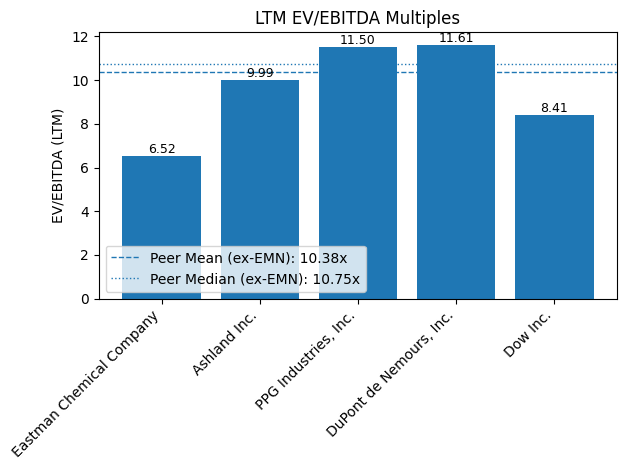

In [24]:
# === 2) Plot histogram of EV/EBITDA (LTM) ===

# We explicitly use the peer stats provided in the prompt (exclude Eastman):
peer_mean_ex_emn = 10.38
peer_median_ex_emn = 10.75

print("Table (rounded):")
print(df.round({"EV (Latest)": 1, "LTM EBITDA": 1, "EV/EBITDA (LTM)": 2}))
print("\nPeer Mean (ex-EMN): 10.38x")
print("Peer Median (ex-EMN): 10.75x")

# === 3) Plot (single plot; do not set any explicit colors/styles) ===
plt.figure()
plt.bar(df["Company"], df["EV/EBITDA (LTM)"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("EV/EBITDA (LTM)")
plt.title("LTM EV/EBITDA Multiples")

# Add horizontal reference lines for peer mean and median
plt.axhline(y=peer_mean_ex_emn, linestyle="--", linewidth=1, label=f"Peer Mean (ex-EMN): {peer_mean_ex_emn:.2f}x")
plt.axhline(y=peer_median_ex_emn, linestyle=":", linewidth=1, label=f"Peer Median (ex-EMN): {peer_median_ex_emn:.2f}x")

# Annotate bar values on top of each bar
for x, y in zip(range(len(df)), df["EV/EBITDA (LTM)"]):
    plt.text(x, y, f"{y:.2f}", ha="center", va="bottom", fontsize=9)

# Place legend; tight_layout for better spacing
plt.legend()
plt.tight_layout()

#### Interpretion
##### b) Eastman vs. peers on LTM EV/EBITDA

* **Multiples (LTM EV/EBITDA)**

  * Eastman (EMN): **6.52x**
  * Dow (DOW): **8.41x**
  * Ashland (ASH): **9.99x**
  * PPG (PPG): **11.50x**
  * DuPont (DD): **11.61x**
  * **Peer mean (ex-Eastman): 10.38x; median: 10.75x**

* **Key formulas**

  $$
  \text{EV/EBITDA (LTM)}=\frac{\text{Total Enterprise Value (Latest)}}{\text{LTM EBITDA}}
  $$

  $$
  \text{Discount vs. Mean}=\frac{\overline{M}_{\text{peers}}-M_{\text{EMN}}}{\overline{M}_{\text{peers}}},\qquad
  \text{Discount vs. Median}=\frac{\tilde{M}_{\text{peers}}-M_{\text{EMN}}}{\tilde{M}_{\text{peers}}}
  $$

* **Interpretation**

  * Eastman’s **6.52x** trades **well below** peers:

    * ~**37%** discount to the peer **mean** and ~**39%** to the **median**.
    * ~**22%** below the second-lowest (Dow at 8.41x).
  * If EV/EBITDA is the key industry metric and Eastman’s fundamentals/risks are comparable to peers, this points to **potential undervaluation**; if risks or growth are structurally worse, the discount may be **justified**.

##### c) Expected return and alpha (CAPM)

* **Given**: $\beta=1.52$, $R_f=5.25\%$, market risk premium $\text{MRP}=4.5\%$; analyst 1-yr forecast $=15\%$.

* **CAPM expected return**

  $$
  \mathbb{E}[R]=R_f+\beta\times \text{MRP}
  = 5.25\%+1.52\times 4.5\%
  = \mathbf{12.09\%}
  $$

* **Alpha (forecast − CAPM)**

  $$
  \alpha=R_{\text{forecast}}-\mathbb{E}[R]
  = 15\%-12.09\%
  = \mathbf{2.91\%}
  $$

**Conclusion:** CAPM implies an expected return of **12.09%** for Eastman; the analyst’s **15%** forecast embeds a **positive alpha of ~2.9%**.

---
---